# Project of Chinahadoop.cn
## Machine Learning L1
### Predict The Result of Loan Application


In this program, data is stored as csv document and the data comes from https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/ 

The key point of bank loan approval is risk control. Therefore, the focus of the applicant's review is the possibility of default, so the applicant's income, stability, loan amount and repayment period will be evaluated. According to the applicant's conditions, the project further refines the impact of various variables and classic machine learning algorithms were used, so as to scientifically classify loan application customers, helping financial institutions to improve their ability to control credit risk of loans.

In [1]:
# Delete warning for the beauty of exporting this file
import warnings
warnings.filterwarnings('ignore')

## 1. Read Data

In [2]:
import pandas as pd

file = './data/loan_records.csv'
loan_df = pd.read_csv(file)

### 1.1 Preview of Data

In [3]:
print('Data set has {}rows and {}colunmns'.format(loan_df.shape[0], loan_df.shape[1]))

Data set has 614rows and 13colunmns


In [4]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Data Characteristics could be read from the sample of loans.

- **Loan_ID**：Number
- **Gender**：(Male/ Female)
- **Married**：(Y/N)
- **Dependents**：Number
- **Education**：(Graduate/ Not Graduate)
- **Self_Employed**：(Y/N)
- **ApplicantIncome**: Number
- **CoapplicantIncome**： Number
- **LoanAmount**： Number(Unit: Thousand)
- **Loan_Amount_Term**: Number(Unit: Month)
- **Credit_History**：History credit correspond the standard or not（0/1)
- **Property_Area**：(Urban/ Semi Urban/ Rural)
- **Loan_Status**：Approve or not(Y/N)
---
In the Machine Learning Model we will set up，**Loan_Status** will be the target column.

### 1.2 Statistics of the Data

In [5]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


From observation of the table above, 

- LoanAmount、Loan_Amount_Term、Credit_History column has obvious null value, and this need to be addressed.

## 2. Data Processing

### 2.1 Repulicates Processing

In [6]:
if loan_df[loan_df['Loan_ID'].duplicated()].shape[0] > 0:
    print('Replicates exsit in this dataset')
else:
    print('Replicates do not exsit in this dataset')

Replicates do not exsit in this dataset


### 2.2 Null Value Processing

In [7]:
cols = loan_df.columns.tolist()

for col in cols:
    empty_count = loan_df[col].isnull().sum()
    print('{} Total amount of null value：{}'.format(col, empty_count))

Loan_ID Total amount of null value：0
Gender Total amount of null value：13
Married Total amount of null value：3
Dependents Total amount of null value：15
Education Total amount of null value：0
Self_Employed Total amount of null value：32
ApplicantIncome Total amount of null value：0
CoapplicantIncome Total amount of null value：0
LoanAmount Total amount of null value：22
Loan_Amount_Term Total amount of null value：14
Credit_History Total amount of null value：50
Property_Area Total amount of null value：0
Loan_Status Total amount of null value：0


In [8]:
# Delet Null vaule in the sample
clean_loan_df = loan_df.dropna()
print('The size of original sample is {}，and the size of sample after null cleaning is {}'.format(loan_df.shape[0], clean_loan_df.shape[0]))

The size of original sample is 614，and the size of sample after null cleaning is 480


### 2.3 Special Value Proceesing
Dependents columns contain 3+. Transfer 3+ into 3.

In [9]:
# Neglect SettingWithCopyWarning
clean_loan_df.loc[clean_loan_df['Dependents'] == '3+', 'Dependents'] = 3

### 2.4 Extract Feature Data
Below are three types of featurn columns:
1. Numerical Variables
    - **Dependents**
    - **ApplicantIncome**
    - **CoapplicantIncome**
    - **LoanAmount**: (Unit: thousand)
    - **Loan_Amount_Term**：(Unit: month)
2. Label Variables
    - **Education**: (Graduate/ Not Graduate)
    - **Credit_History**：History credit meet the standard or not(0/1)
3. Categorical Variables
    - **Gender**：(Male/ Female)
    - **Married**：(Y/N)
    - **Self_Employed**：(Y/N)
    - **Property_Area**：(Urban/ Semi Urban/ Rural)

In [10]:
# Design feature columns according to types of variables
# 1. Numeric features
num_cols = ['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# 2. Label Variables
ord_cols = ['Education', 'Credit_History']

# 3. Categorical Variables
cat_cols = ['Gender', 'Married', 'Self_Employed', 'Property_Area']

feat_cols = num_cols + ord_cols + cat_cols

# Feature data
feat_df = clean_loan_df[feat_cols]

# Lable data
# Transfer 'Y' to '1'; 'N' to '0'
# Save the result to label
labels = clean_loan_df['Loan_Status'].copy()
labels.loc[clean_loan_df['Loan_Status'] == 'Y'] = 1
labels.loc[clean_loan_df['Loan_Status'] == 'N'] = 0

Divide trainning set and test set

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feat_df, labels, random_state=10, test_size=1/4)
print('Train set has {} records，and test set has {} records'.format(X_train.shape[0], X_test.shape[0]))

Train set has 360 records，and test set has 120 records


### Question:
What's the effect of rand_state in train_test_split method?

Answer: Generate random numbers

## 4. Feature Processing

### 4.1 Label Columns

Transfer 'Graduate' to 1 and 'undergradute' to 0

In [12]:
# Train set
X_train.loc[X_train['Education'] == 'Graduate', 'Education'] = 1
X_train.loc[X_train['Education'] == 'Not Graduate', 'Education'] = 0

# Test set
X_test.loc[X_test['Education'] == 'Graduate', 'Education'] = 1
X_test.loc[X_test['Education'] == 'Not Graduate', 'Education'] = 0

# Get the results of Label columns
train_ord_feats = X_train[ord_cols].values
test_ord_feats = X_test[ord_cols].values

### 4.2 Categorical Columns

In [13]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

def encode_cat_feats(train_df, test_df, col_name):
    """
        Encoding
    """
    # categorical variables
    train_cat_feat = X_train[col_name].values
    test_cat_feat = X_test[col_name].values
    
    label_enc = LabelEncoder()
    onehot_enc = OneHotEncoder(sparse=False)

    # Train set 
    proc_train_cat_feat = label_enc.fit_transform(train_cat_feat).reshape(-1, 1)
    proc_train_cat_feat = onehot_enc.fit_transform(proc_train_cat_feat)

    # Test set
    proc_test_cat_feat = label_enc.transform(test_cat_feat).reshape(-1, 1)
    proc_test_cat_feat = onehot_enc.transform(proc_test_cat_feat)
    
    return proc_train_cat_feat, proc_test_cat_feat

# Default
enc_train_cat_feats = None
enc_test_cat_feats = None

# Encoding
for cat_col in cat_cols:
    enc_train_cat_feat, enc_test_cat_feat = encode_cat_feats(X_train, X_test, cat_col)
    # Combine features in train set
    if enc_train_cat_feats is None:
        enc_train_cat_feats = enc_train_cat_feat
    else:
        enc_train_cat_feats = np.hstack((enc_train_cat_feats, enc_train_cat_feat))
        
    # Combine features in test set
    if enc_test_cat_feats is None:
        enc_test_cat_feats = enc_test_cat_feat
    else:
        enc_test_cat_feats = np.hstack((enc_test_cat_feats, enc_test_cat_feat))

### 4.3 Normalization

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Get numerical features
train_num_feats = X_train[num_cols].values
test_num_feats = X_test[num_cols].values

# Combine sequence features, categorical featueres and numerical features
all_train_feats = np.hstack((train_ord_feats, enc_train_cat_feats, train_num_feats))
all_test_feats = np.hstack((test_ord_feats, enc_test_cat_feats, test_num_feats))

#################################################################

# Normalization 
scaler = MinMaxScaler(feature_range=(0, 1))
all_proc_train_feats = scaler.fit_transform(all_train_feats)
all_proc_test_feats = scaler.transform(all_test_feats)


print('Feature dimension after processing is ', all_proc_train_feats.shape[1])

Feature dimension after processing is  16


## 5. Set Up Test Model

Use GridSearchCV to adjust important parameteres

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import time

def train_test_model(X_train, y_train, X_test, y_test, model_name, model, param_range):
    """
        Train and test model
        model_name:     parameter_name:
            kNN         n_neighbors
            LR          C
            SVM         C
            DT          max_depth
            AdaBoost    n_estimators
            GBDT        learning_rate
            RF          n_estimators

       Return:
        1. Best model
        2. Average training time
        3. Accuracy
    """
    print('Train{}...'.format(model_name))
    
    #################################################################
    clf = GridSearchCV(estimator=model,
                      param_grid=param_range,
                      cv=5,
                      scoring='accuracy',
                      refit=True)
    
    start = time.time()
    clf.fit(X_train, y_train)
    # Timing
    end = time.time()
    duration = end - start
    print('Time consuming: {:.4f}s'.format(duration))

    # Test model
    train_score = clf.score(X_train, y_train)
    print('Accuracy{:.3f}%'.format(train_score * 100))

    test_score = clf.score(X_test, y_test)
    print('Accuracy: {:.3f}%'.format(test_score * 100))
    print('Timing: {:.4f}s'.format(duration))

    y_pred = clf.predict(X_test)

    return clf, test_score, duration

In [16]:
# Add LR and SVM in model_name_param_dict and appoint corres                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
# Appoint hyperparameters
model_name_param_dict = {'kNN': (KNeighborsClassifier(),
                                 {'n_neighbors': [1, 5, 15]}),
                         'DT': (DecisionTreeClassifier(),
                                {'max_depth': [10, 50, 100]}),
                         'SVM': (SVC(kernel='linear'),
                                {'C': [0.01, 1, 100]}),
                         'LR': (LogisticRegression(),
                                {'C': [0.01, 1, 100]})
                         }
#################################################################

# Compare results
results_df = pd.DataFrame(columns=['Accuracy (%)', 'Time (s)'],
                          index=list(model_name_param_dict.keys()))
results_df.index.name = 'Model'
for model_name, (model, param_range) in model_name_param_dict.items():
    _, best_acc, mean_duration = train_test_model(all_proc_train_feats, y_train, all_proc_test_feats, y_test,
                                                        model_name, model, param_range)
    results_df.loc[model_name, 'Accuracy (%)'] = best_acc * 100
    results_df.loc[model_name, 'Time (s)'] = mean_duration

TrainkNN...
Time consuming: 0.0609s
Accuracy80.556%
Accuracy: 76.667%
Timing: 0.0609s
TrainDT...
Time consuming: 0.0259s
Accuracy91.111%
Accuracy: 75.000%
Timing: 0.0259s
TrainSVM...
Time consuming: 0.0688s
Accuracy80.556%
Accuracy: 81.667%
Timing: 0.0688s
TrainLR...
Time consuming: 0.0300s
Accuracy80.556%
Accuracy: 81.667%
Timing: 0.0300s


C:\Users\CUPGZ\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\CUPGZ\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Visulization
Compare efficiency and accuracy of different models

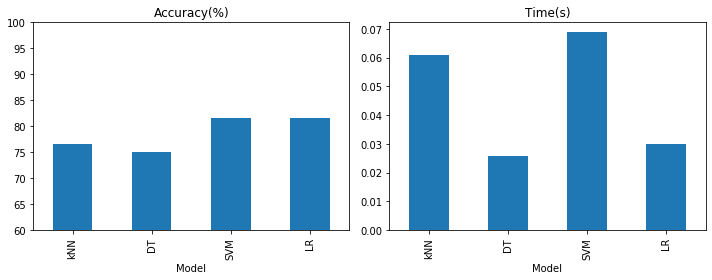

In [17]:
# Visulization

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 4))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)
results_df.plot(y=['Time (s)'], kind='bar', ax=ax2, title='Time(s)', legend=False)
plt.tight_layout()
plt.show()